In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.constants as con
from scipy import stats

In [3]:
messung = pd.read_csv("Data/Balmer Serie.tsv",sep='\t',decimal=",")
messung

,n He,u(n) He,λ (lit) in n He,n H,u(n) H,λ (lit) in nm H
0,1.754072,0.080406,667.82,1.762804,0.080604,656.28
1,1.761738,0.080580,587.56,1.808508,0.081632,486.31
2,1.779312,0.080977,501.57,1.832677,0.082171,434.05
3,1.781823,0.081034,492.19,NaN,NaN,NaN
4,1.791032,0.081241,471.31,NaN,NaN,NaN
5,1.800519,0.081454,447.15,NaN,NaN,NaN


Text(0, 0.5, 'Dispersion n')

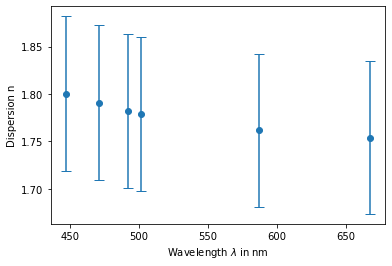

In [4]:
x = messung["λ (lit) in n He"]
y = messung["n He"]
plt.errorbar(x,y, yerr=messung["u(n) He"],fmt='o', capsize=5)


plt.xlabel("Wavelength $\lambda$ in nm")
plt.ylabel("Dispersion n")


[ 1.71415408e+00 -2.37273581e+07  2.37442220e+07] [4.08507003e-03 2.51684934e+10 2.51684930e+10]


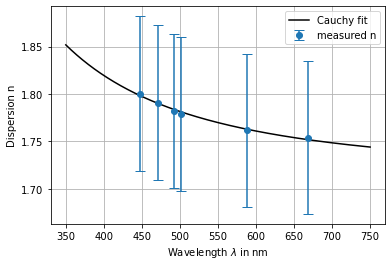

In [5]:

def fit(l,A,B,C):
    return A + B/np.power(l,2) + C/np.power(l,2)
    #return m_0*theta + c

c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

xf = np.linspace(350,750,500)
yf = fit(xf, c[0],c[1],c[2])
plt.plot(xf,yf,color="k", label="Cauchy fit")
plt.errorbar(x,y, yerr=messung["u(n) He"],fmt='o', capsize=5, label="measured n")

plt.legend()
plt.xlabel("Wavelength $\lambda$ in nm")
plt.ylabel("Dispersion n")
plt.grid()

plt.savefig("Bilder/balmer-cauchy-fit.png", dpi=300)

In [6]:
xn = xf

nH = messung["n H"]
print(nH)

yn0 = [nH[0]]*500
yn1 = [nH[1]]*500
yn2 = [nH[2]]*500


0    1.762804
1    1.808508
2    1.832677
3         NaN
4         NaN
5         NaN
Name: n H, dtype: float64


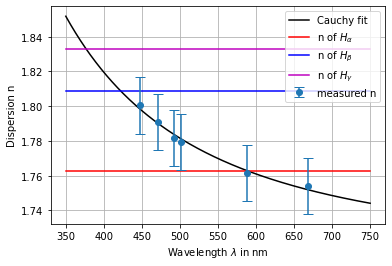

In [7]:
plt.plot(xf,yf,color="k", label="Cauchy fit")

plt.plot(xn,yn0,color="r", label=r"n of $H_\alpha$")
plt.plot(xn,yn1,color="b", label=r"n of $H_\beta$")
plt.plot(xn,yn2,color="m", label=r"n of $H_\gamma$")


plt.errorbar(x,y, yerr=messung["u(n) He"]/5,fmt='o', capsize=5, label="measured n")

plt.legend(loc="upper right")
plt.xlabel("Wavelength $\lambda$ in nm")
plt.ylabel("Dispersion n")
plt.grid()


# Wichtig: unsicherheitsbalken haben nur 1/5 der realen länge
plt.savefig("Bilder/balmer-comparison-H.png", dpi=300)

In [8]:
line_1 = ls(np.column_stack((xn,yn0)))
line_2 = ls(np.column_stack((xf,yf)))
intersection = line_1.intersection(line_2)
H = [intersection.x]*3

line_1 = ls(np.column_stack((xn,yn1)))
line_2 = ls(np.column_stack((xf,yf)))
intersection = line_1.intersection(line_2)
H[1] = intersection.x

line_1 = ls(np.column_stack((xn,yn2)))
line_2 = ls(np.column_stack((xf,yf)))
intersection = line_1.intersection(line_2)
H[1] = intersection.x
print(H)


[588.7617555169004, 377.2053530085304, 588.7617555169004]


\SI{12229.0 \pm 831.0}{\per\kilo\m}
\SI{14139.0 \pm 1499.0}{\per\kilo\m}
\SI{8088.0 \pm 549.0}{\per\kilo\m}
\SI{589.0 \pm 40}{\nano\m}
\SI{377.0 \pm 40}{\nano\m}
\SI{589.0 \pm 40}{\nano\m}
\SI{10532.0 \pm 1800.0}{\per\kilo\m}


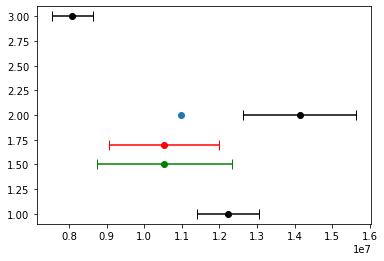

In [9]:
uH = 40
R = [0]*3
R[0] = 1/(H[0]*(1/4. - 1/9))*1e9
R[1] = 1/(H[1]*(1/4. - 1/16))*1e9
R[2] = 1/(H[2]*(1/4. - 1/25))*1e9
uR = uH * np.divide(R,H)

LR = 10973731

# print(R,uR)
for i in range(len(R)):
    print("\SI{" + str(np.round(R[i]/1e3)) + " \pm " + str(np.round(uR[i]/1e3)) + "}{\per\kilo\m}")

plt.errorbar(R,[1,2,3], xerr=uR,fmt='o', capsize=5,color="k")
plt.errorbar(np.average(R,weights=np.divide(1,uR)),1.7,xerr=np.sqrt(np.var(R)/3),fmt='o', capsize=5,color="r")
plt.errorbar(np.average(R,weights=np.divide(1,uR)),1.5,xerr=np.sqrt(np.sum(np.power(uR,2))),fmt='o', capsize=5,color="g")

plt.scatter(LR,2)
AR = np.average(R,weights=np.divide(1,uR))
uAR = np.sqrt(np.sum(np.power(uR,2)))

for i in range(len(H)):
    print("\SI{" + str(np.round(H[i])) + " \pm " + str(uH) + r"}{\nano\m}")

print("\SI{" + str(np.round(AR/1e3)) + " \pm " + str(np.round(uAR/1e3)) + "}{\per\kilo\m}")


In [10]:
d =np.add(R,-LR)
# print(d)
t = np.divide(d,uR)
print(t)

[ 1.5109239   2.11114161 -5.25163353]


In [11]:
d =np.add(AR,-LR)
print(d)
t = np.divide(d,uAR)
print(t)

-441565.85450558737
-0.24530398467333211
